# Exploring Wine Quality with PCA and K-Nearest Neighbors

**Wine Quality (Red) Dataset:**

The Wine Quality (Red) dataset typically includes various chemical and physical properties of red wines, along with a quality rating. The dataset is often used for classification and regression tasks in machine learning. Here are some common features found in such wine datasets:

1. **Fixed Acidity:** The amount of non-volatile acids in the wine.
2. **Volatile Acidity:** The amount of acetic acid in the wine, which can contribute to its taste and smell.
3. **Citric Acid:** The amount of citric acid in the wine, which can also affect its taste.
4. **Residual Sugar:** The amount of sugar remaining after fermentation.
5. **Chlorides:** The amount of salt in the wine.
6. **Free Sulfur Dioxide:** The amount of free sulfur dioxide in the wine, which acts as an antioxidant.
7. **Total Sulfur Dioxide:** The total amount of sulfur dioxide (free + bound forms).
8. **Density:** The density of the wine.
9. **pH:** The acidity or alkalinity level of the wine.
10. **Sulphates:** The amount of sulphates in the wine, which can contribute to its preservation.
11. **Alcohol:** The alcohol content of the wine.

**Target Variable:**
The target variable in this dataset is often the quality rating of the wine. The quality is typically a discrete variable, often ranging from 3 to 8, where higher values represent better quality.

**Data Exploration and Visualization:**
The notebook begins with loading the dataset and exploring its structure. Visualizations such as pair plots, a correlation heatmap, and boxplots are utilized to gain insights into the relationships between features and the distribution of values across different wine quality levels.

**Data Preprocessing:**
The features and target variable are separated, and the dataset is split into training and testing sets. Standardization of features is performed using the StandardScaler.

**K-Nearest Neighbors (KNN) Classifier:**
A KNN classifier is initially trained without Principal Component Analysis (PCA). The accuracy of the model on the test set is evaluated, providing a baseline for comparison.

**Principal Component Analysis (PCA):**
PCA is then applied to the standardized features to reduce dimensionality. The explained variance ratio of principal components is visualized, illustrating the impact of PCA on capturing the dataset's variability.

**Optimizing KNN with GridSearchCV:**
A KNN classifier is trained after PCA using GridSearchCV for hyperparameter tuning. The best model is selected based on the grid search results, and its accuracy on the test set is reported.

**Impact of PCA:**
The notebook compares the number of features before and after PCA, highlighting the reduction in dimensionality. Confusion matrices and classification reports are presented for the KNN model both before and after PCA, demonstrating the impact of dimensionality reduction on model performance.

This comprehensive analysis provides insights into the Wine Quality dataset, the impact of PCA on KNN classification, and the overall performance of the machine learning model.









In [40]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Load the Wine Quality (red) dataset from a CSV file
wine_data = pd.read_csv("/content/drive/MyDrive/winequality-red.csv", delimiter=';')

# Display the first 10 rows of the dataset to inspect the data
wine_data.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

In [26]:
# Separate features and target variable
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

<Figure size 1500x1000 with 0 Axes>

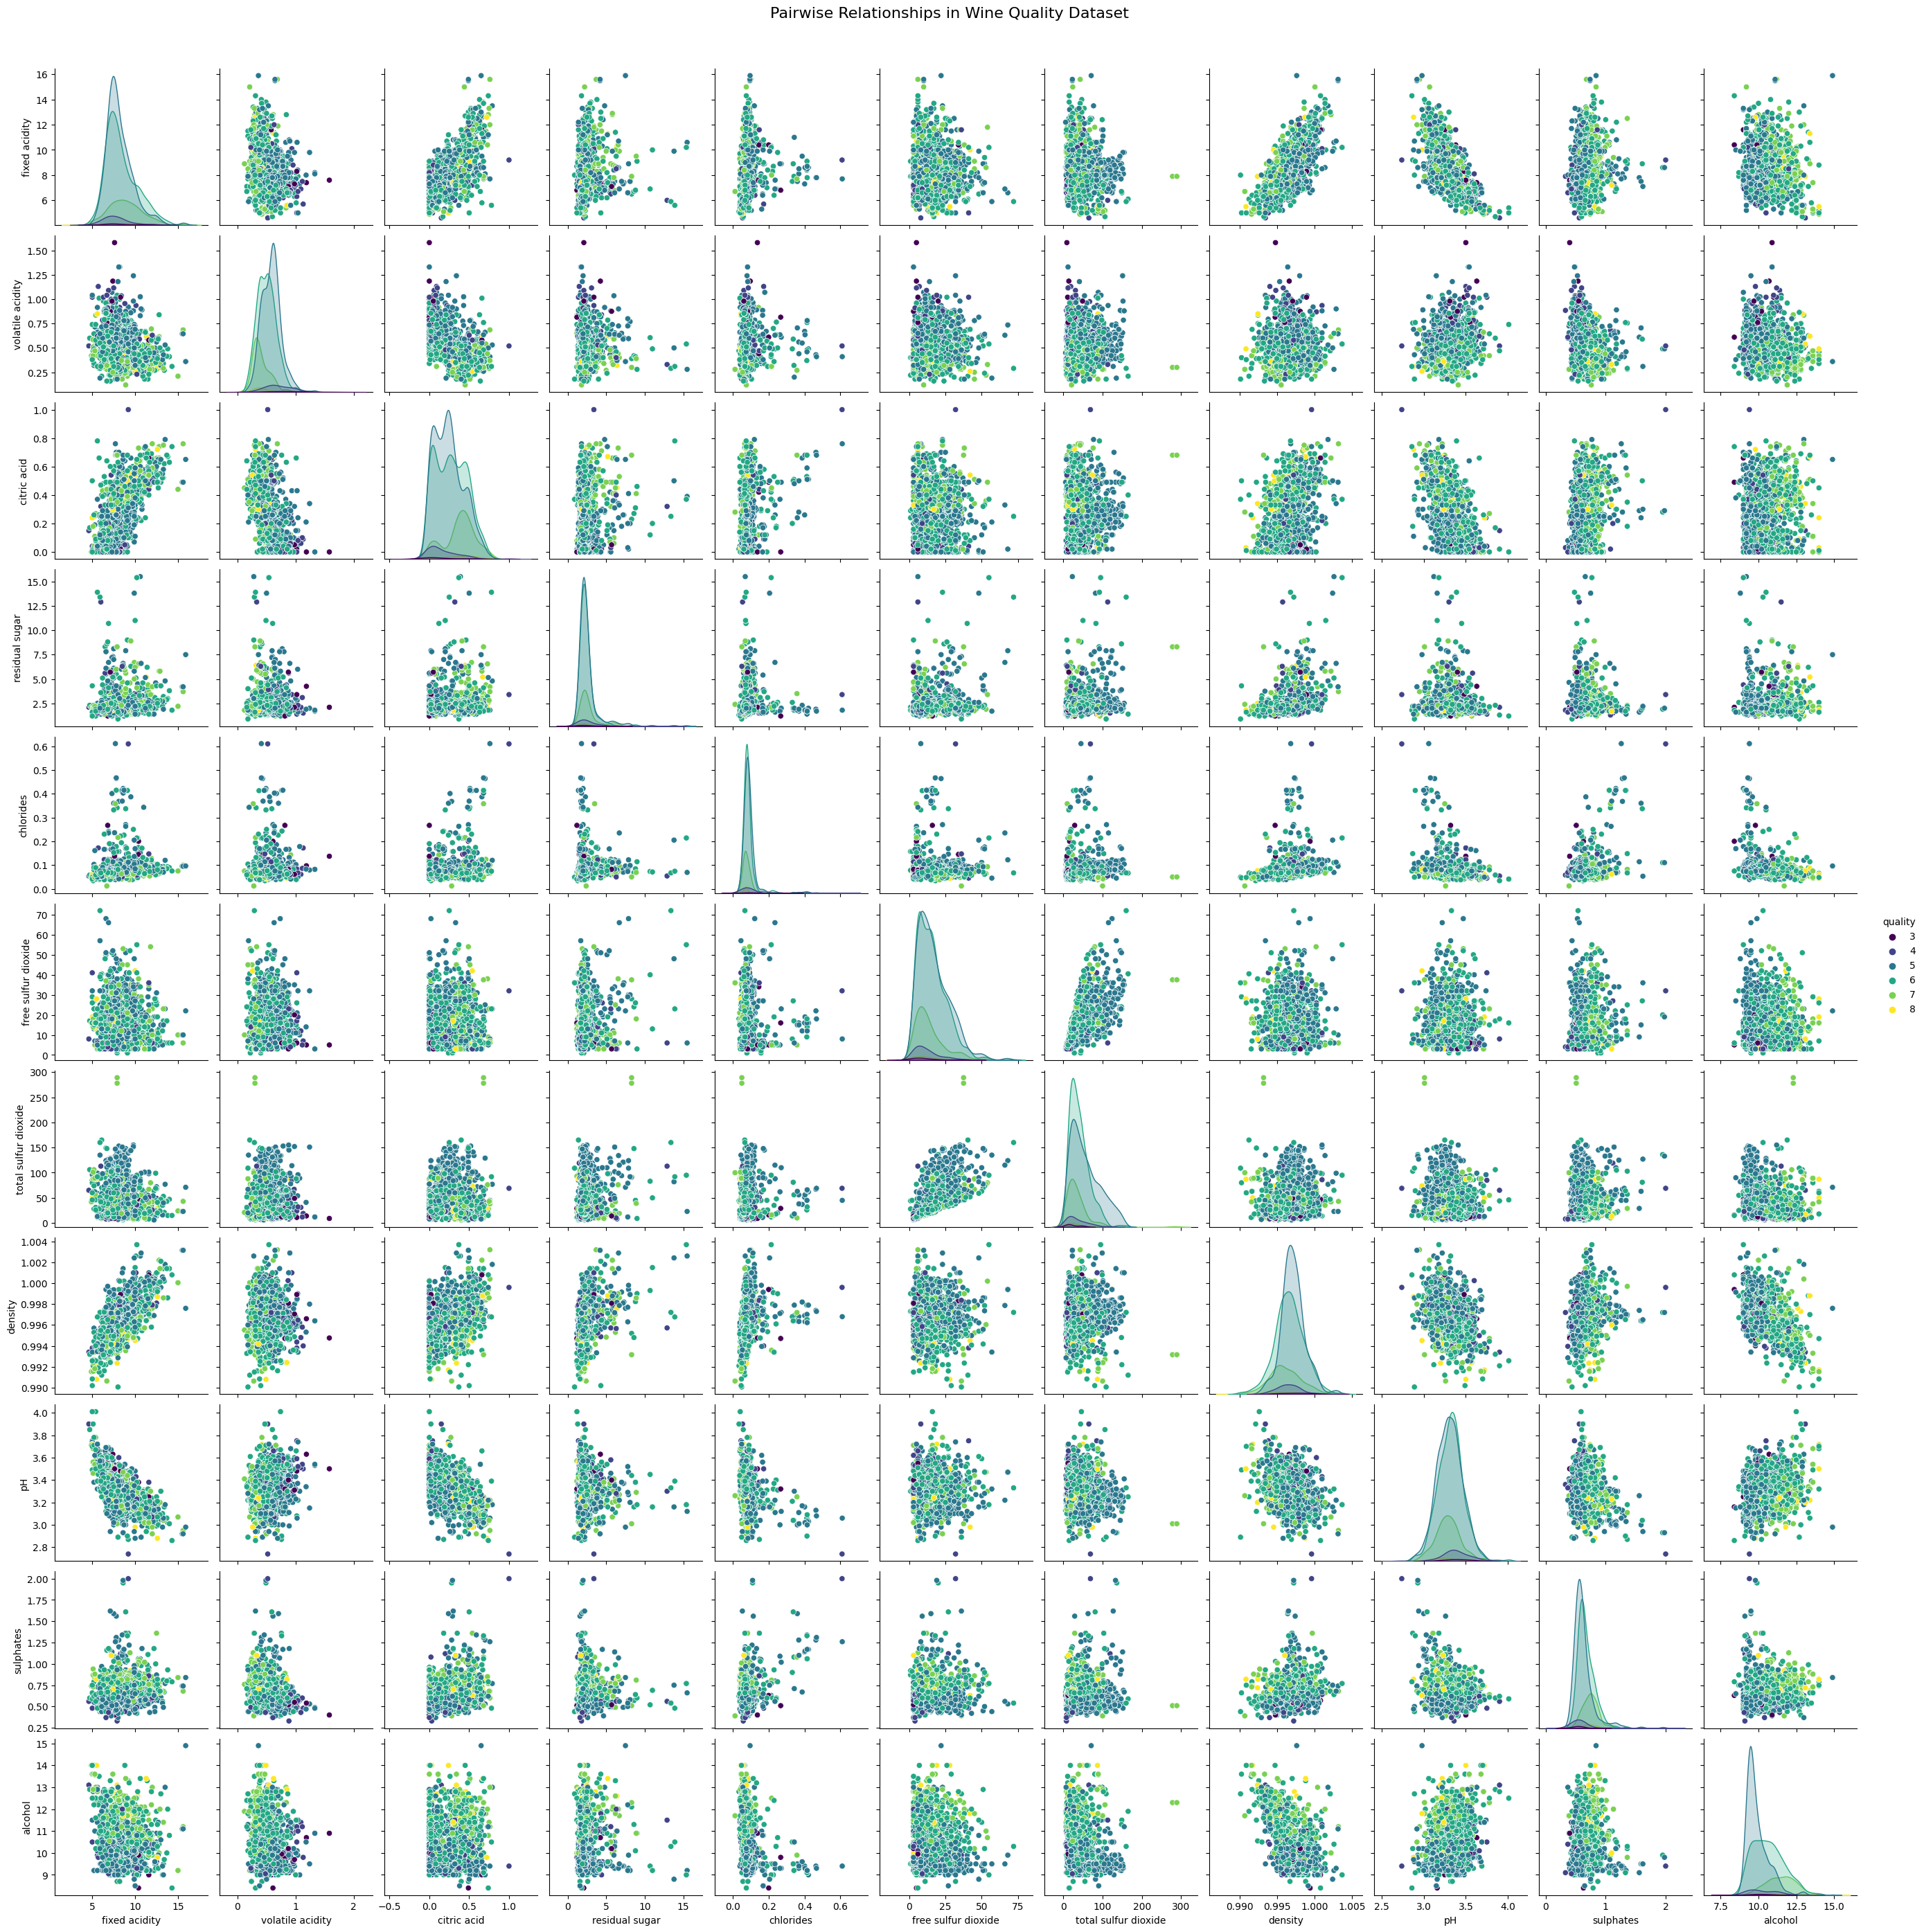

In [10]:
# Visualize the dataset using pairplot
plt.figure(figsize=(15, 10))
sns.pairplot(wine_data, hue='quality', palette='viridis')
plt.suptitle('Pairwise Relationships in Wine Quality Dataset', y=1.02, fontsize=16)
plt.show()

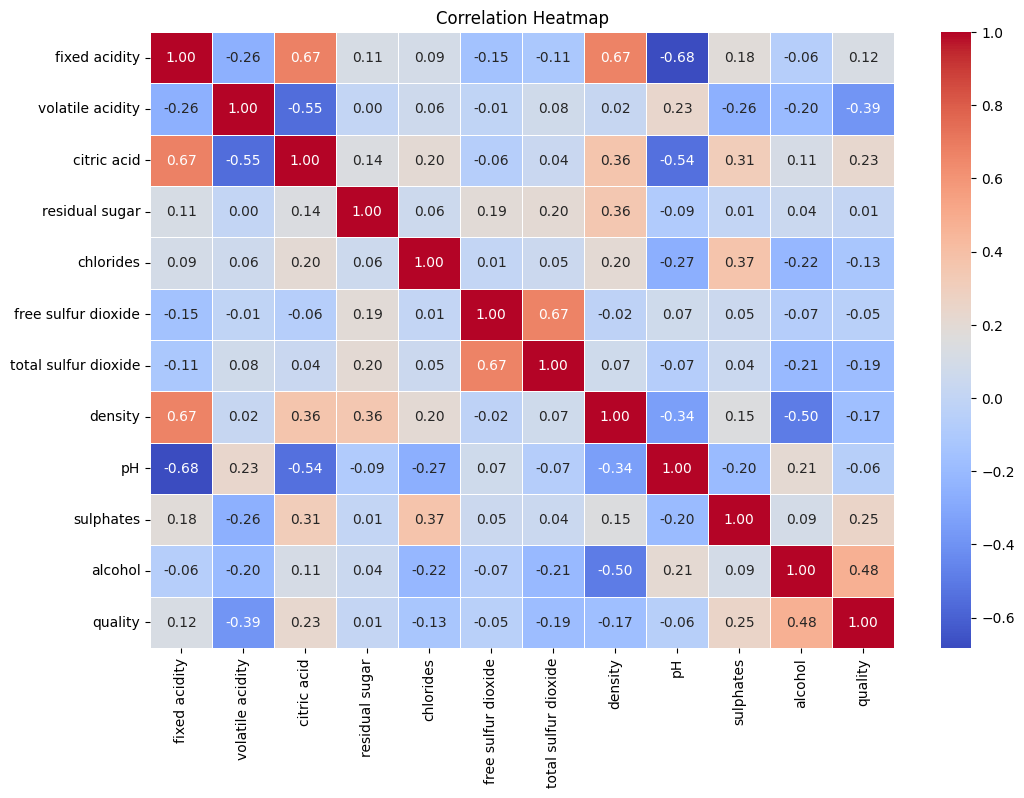

In [11]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = wine_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

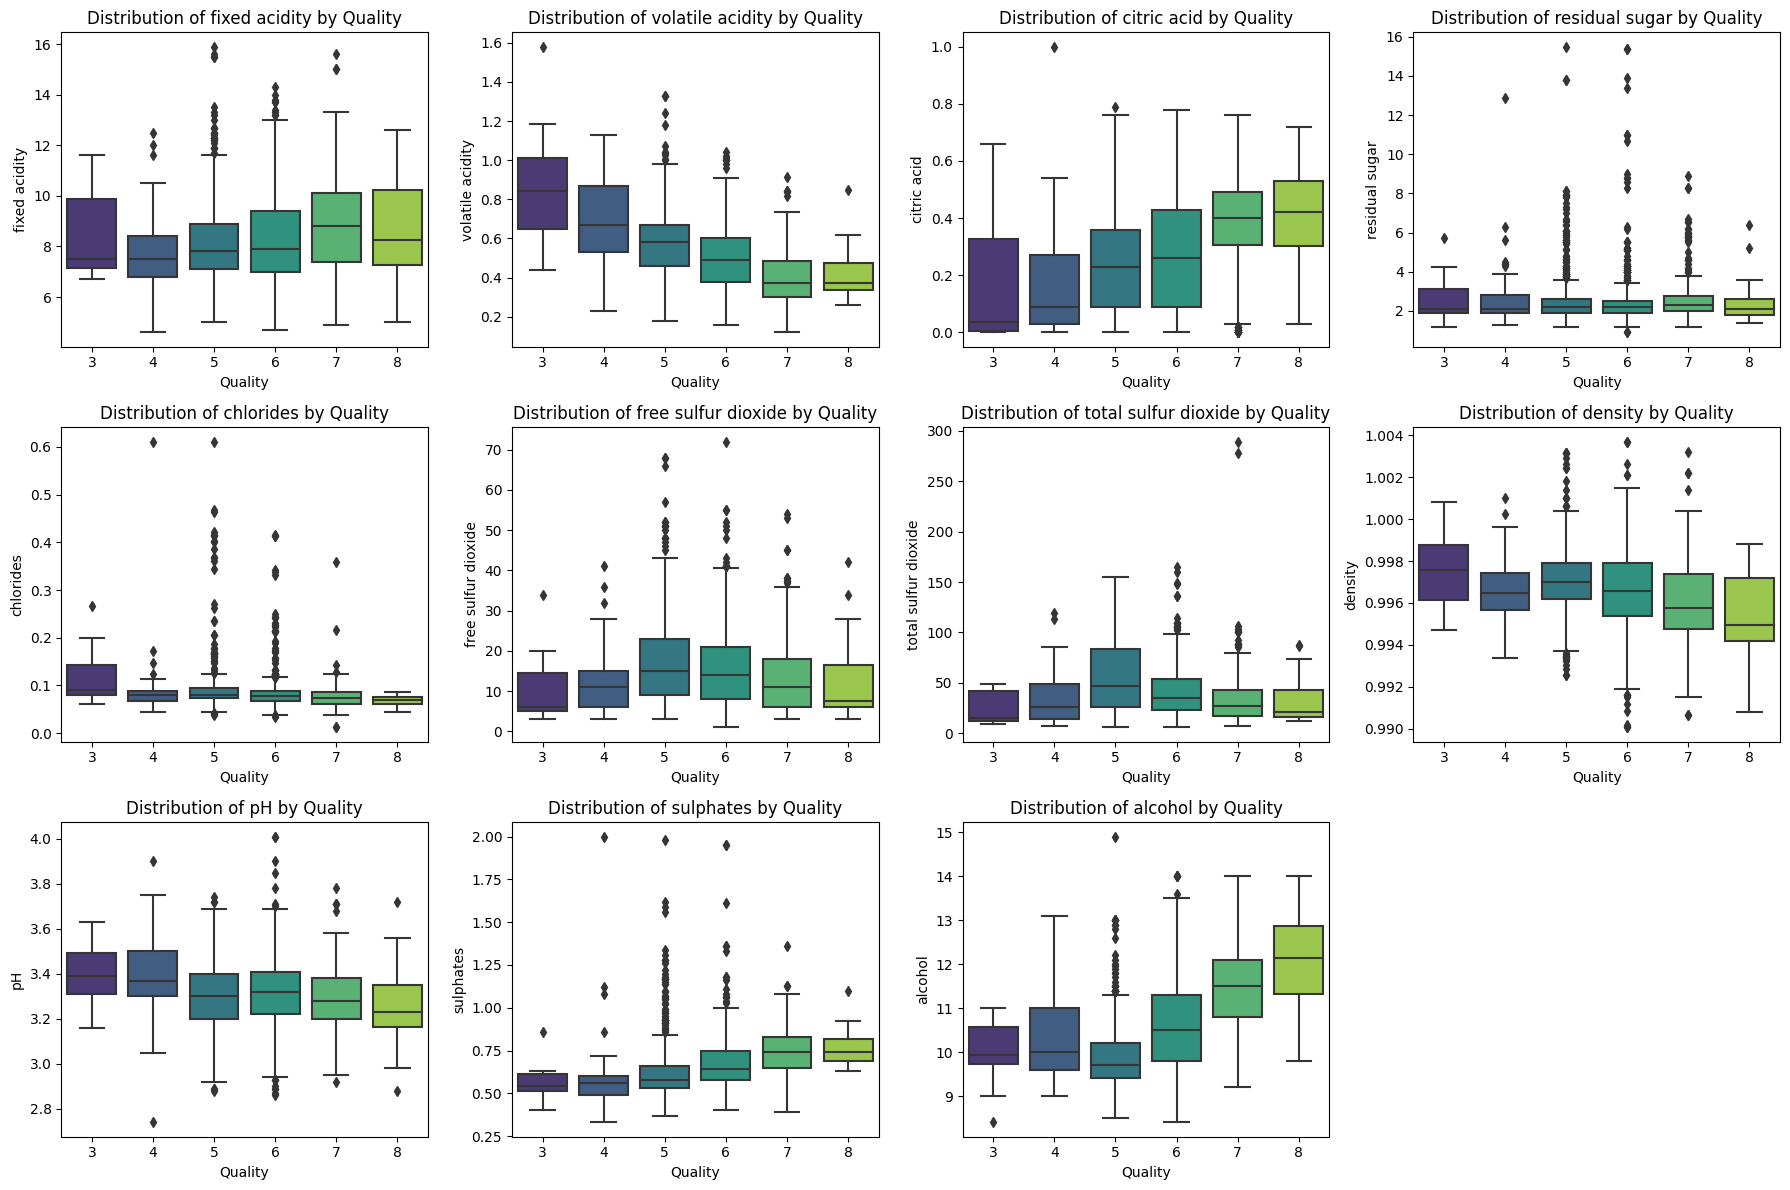

In [12]:
# Boxplot to visualize the distribution of features across different quality levels
features = wine_data.columns[:-1]  # Exclude the 'quality' column
num_features = len(features)

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='quality', y=feature, data=wine_data, palette='viridis')
    plt.title(f'Distribution of {feature} by Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

In [27]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Train a k-Nearest Neighbors (KNN) classifier without PCA
knn_original = KNeighborsClassifier()
knn_original.fit(X_train_scaled, y_train)

# Evaluate the KNN model on the test set without PCA
y_pred_original = knn_original.predict(X_test_scaled)
accuracy_original = accuracy_score(y_test, y_pred_original)
print(f"Accuracy before PCA with KNN: {accuracy_original:.2f}")

Accuracy before PCA with KNN: 0.55


In [15]:
# Apply PCA
n_components = 5
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

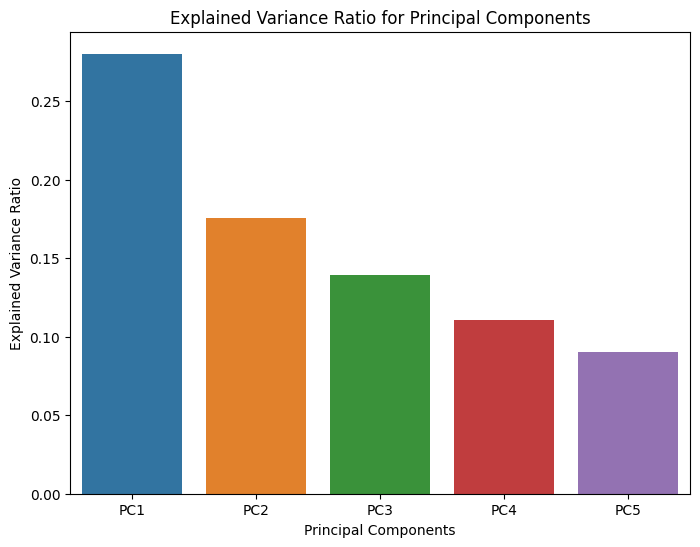

In [16]:
# Visualize explained variance ratio
plt.figure(figsize=(8, 6))
sns.barplot(x=[f'PC{i}' for i in range(1, n_components + 1)], y=pca.explained_variance_ratio_)
plt.title('Explained Variance Ratio for Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [42]:
# Train a k-Nearest Neighbors (KNN) classifier with GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Get the best model from the grid search
best_knn = grid_search.best_estimator_

# Evaluate the best KNN model on the test set
y_pred_knn = best_knn.predict(X_test_pca)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Best Accuracy after PCA with KNN: {accuracy_knn:.2f}")

Best Accuracy after PCA with KNN: 0.68


In [43]:
# Print the best parameters from the grid search
print("Best Parameters for KNN:")
print(grid_search.best_params_)

Best Parameters for KNN:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


In [44]:
# Compare the impact of PCA
print(f"Number of features before PCA: {X_train.shape[1]}")
print(f"Number of features after PCA: {n_components}")

Number of features before PCA: 11
Number of features after PCA: 8


Text(0.5, 1.0, 'Confusion Matrix - Original Data')

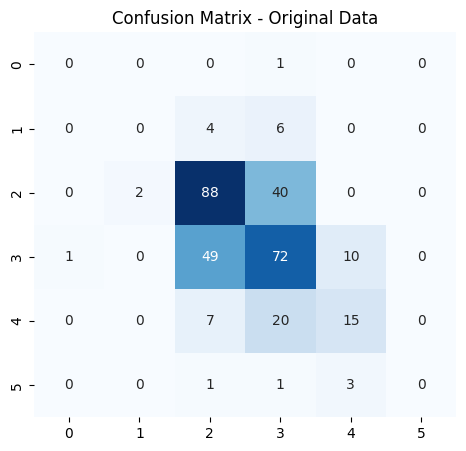

In [31]:
# Visualize confusion matrix before PCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_original), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Original Data')

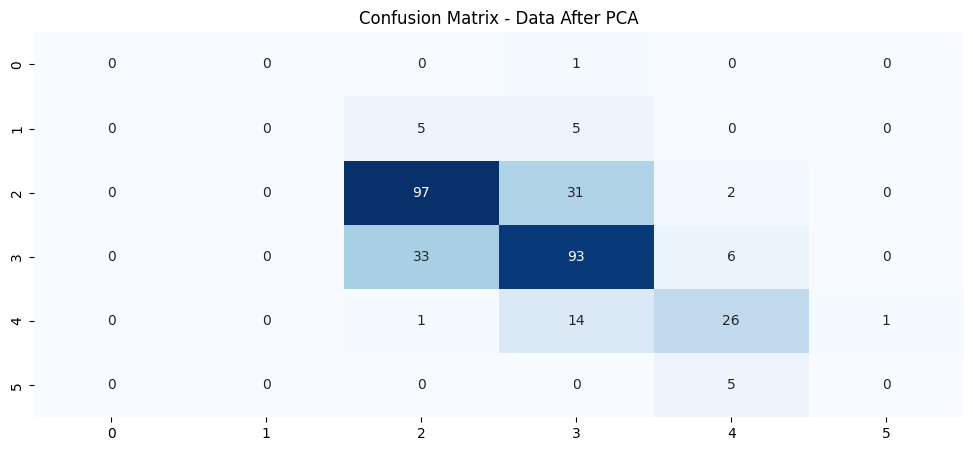

In [45]:
# Visualize confusion matrix after PCA
plt.figure(figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Data After PCA')

plt.show()

In [41]:
# Classification report for KNN without PCA
print("Classification Report - Original Data:")
print(classification_report(y_test, y_pred_original))

# Classification report for KNN after PCA
print("Classification Report - Data After PCA:")
print(classification_report(y_test, y_pred_knn))

Classification Report - Original Data:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.59      0.68      0.63       130
           6       0.51      0.55      0.53       132
           7       0.54      0.36      0.43        42
           8       0.00      0.00      0.00         5

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.52      0.55      0.53       320

Classification Report - Data After PCA:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.75      0.73       130
           6       0.65      0.70      0.67       132
           7       0.67      0.62      0.64        42
           8       0.00      0.00      0.00         5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

**Conclusion:**

The classification reports provide a comprehensive overview of the K-Nearest Neighbors (KNN) model's performance on the original data and after applying Principal Component Analysis (PCA). Here are key observations and conclusions:

**1. Original Data Classification:**
   - **Accuracy:** The KNN classifier achieved an accuracy of 55% on the original data.
   - **Precision and Recall:** The model shows limited precision and recall for some classes, particularly for the quality levels 3, 4, and 8, where both precision and recall are 0.00.
   - **F1-Score:** The F1-scores are moderate for quality levels 5 and 6 but lower for other classes.
   - **Macro and Weighted Averages:** Both macro and weighted averages for precision, recall, and F1-score are relatively low, indicating challenges in the model's performance across different classes.

**2. Data After PCA Classification:**
   - **Accuracy Improvement:** After applying PCA, the KNN classifier demonstrates improved accuracy, achieving 68%.
   - **Precision and Recall Improvement:** Precision and recall generally improve for quality levels 5, 6, and 7. For example, precision and recall for quality level 5 increased to 0.71 and 0.75, respectively.
   - **F1-Score Improvement:** The F1-scores for quality levels 5 and 6 show improvement after PCA.
   - **Macro and Weighted Averages:** Both macro and weighted averages for precision, recall, and F1-score improve, indicating overall enhancement in the model's performance.

**3. Impact of PCA:**
   - **Dimensionality Reduction:** The number of features was reduced from 11 to 8 after PCA.
   - **Accuracy Impact:** The reduction in dimensionality positively impacted the model's accuracy, highlighting the effectiveness of PCA in capturing essential information in fewer dimensions.
   - **Precision-Recall Tradeoff:** While precision and recall improved for certain classes, others may still need further attention. PCA involves a tradeoff, and further tuning or alternative techniques may be explored for better performance on specific quality levels.

**4. Best Model Information:**
   - **Best Accuracy:** The best accuracy achieved after PCA with the KNN classifier is 68%.
   - **GridSearchCV Parameters:** The best hyperparameters were determined using GridSearchCV, indicating the optimal configuration for the KNN model after PCA.

In summary, applying PCA to the Wine Quality (red) dataset improved the KNN classifier's performance, particularly in terms of accuracy, precision, and recall for specific quality levels. The reduction in dimensionality contributed to a more efficient representation of the data, leading to enhanced classification results. Further refinement and exploration of hyperparameters could potentially yield even better results for specific quality classes.